<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our code :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [31]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

### geopandas
https://geopandas.org/

a sister of pandas; does the job; tho not as fancy-interactive as folium or leafmap

just quick focus here on thematic/choloropleth maps: coloring polygons (states, counties, etc) with values of a var, say crime: green=low, red=hi

REFS (also good for self study):

https://geopandas.org/en/stable/gallery/choropleths.html

https://geopandas.org/en/stable/gallery/choro_legends.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

In [32]:
!pip install geopandas
!pip install mapclassify
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


## mapping your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

In [34]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O us-counties.zip https://docs.google.com/uc?id=1vD5R6SXfrb6sPsK4LoWg_LlydWGqIaIO&export=download

zip_ref = zipfile.ZipFile('us-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
uscounty=gpd.read_file('JHU_Centers_for_Civic_Impact_Covid-19_County_Cases_(Daily_Update).shp') #load the shapefile with gpd as njC

https://drive.google.com/file/d/19y-arbFrPCgDVogdo43S7rQCtTAVATK4/view?usp=drive_link

<Axes: >

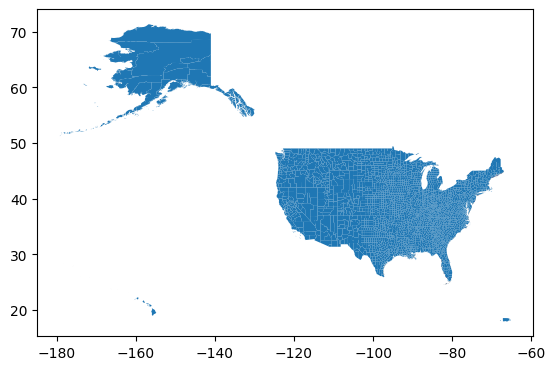

In [35]:
#make the map
uscounty.plot()

## mapping var from data file

In [36]:
# say want to map housing values across nj counties; first need to get the map with counties
# (then we will get regular data with housing values and merge with counties data and color code the polygons)
# maps have their own files, a popular one is 'shapefile', so if you want to map nj counties
# first step is to get the geo data so google 'geography you're looking for + 'shapefile'', eg 'nj counties shapefile'
# i found one and put on my website
# have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names
! wget -q -O uscounty.zip https://docs.google.com/uc?id=1vD5R6SXfrb6sPsK4LoWg_LlydWGqIaIO&export=download
zip_ref = zipfile.ZipFile('uscounty.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
uscounty=gpd.read_file('JHU_Centers_for_Civic_Impact_Covid-19_County_Cases_(Daily_Update).shp') #load the shapefile with gpd as njC

In [37]:
uscounty.dtypes #with geopandas can do stuff like with pandas :)

OBJECTID         int64
Countyname      object
ST_Name         object
ST_Abbr         object
ST_ID           object
                ...   
ICU_COV        float64
ICU_nonCOV     float64
Shape__Are     float64
Shape__Len     float64
geometry      geometry
Length: 94, dtype: object

In [49]:
uscounty.head(5)

,OBJECTID,Countyname,ST_Name,ST_Abbr,ST_ID,FIPS,FatalityRa,Confirmedb,DeathsbyPo,PCTPOVALL_,...,ICU_Occ,Inpat_Cap,Inpat_COV,Inp_nonCOV,ICU_Cap,ICU_COV,ICU_nonCOV,Shape__Are,Shape__Len,geometry
0,1,Autauga,Alabama,AL,01,01001,1.172309,33653.60,394.524275,15.2,...,100.000000,89.0,1.333333,61.333333,6.0,0.0,6.000000,2.209382e+09,246839.865479,"POLYGON ((-86.41312 32.70739, -86.41219 32.526..."
1,2,Baldwin,Alabama,AL,01,01003,1.040653,30142.34,313.677098,10.4,...,85.416667,375.0,2.000000,285.333333,32.0,0.0,27.333333,5.770469e+09,728445.072448,"MULTIPOLYGON (((-87.78878 31.29877, -87.78849 ..."
2,3,Barbour,Alabama,AL,01,01005,1.376086,29675.30,408.357452,30.7,...,0.000000,25.0,0.000000,8.000000,5.0,0.0,0.000000,3.258643e+09,307285.154510,"POLYGON ((-85.25609 32.13767, -85.25569 32.135..."
3,4,Bibb,Alabama,AL,01,01007,1.347176,36293.90,488.942717,18.1,...,NaN,29.0,0.000000,11.333333,0.0,0.0,0.000000,2.310715e+09,227886.963840,"POLYGON ((-87.02685 33.24646, -87.02572 33.209..."
4,5,Blount,Alabama,AL,01,01009,1.395423,31629.86,441.370447,13.6,...,0.000000,38.0,0.000000,12.333333,6.0,0.0,0.000000,2.456058e+09,286306.840721,"POLYGON ((-86.44507 34.24954, -86.40902 34.205..."


<Axes: >

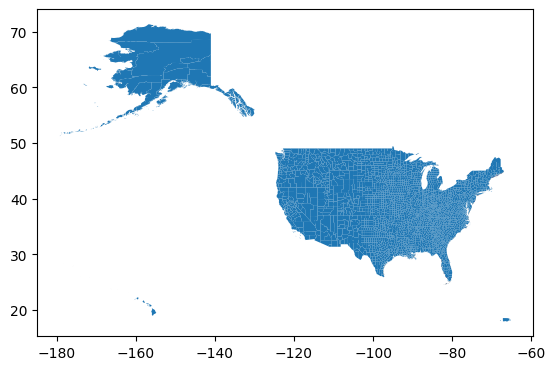

In [39]:
uscounty.plot() #yay love the shape

<Axes: >

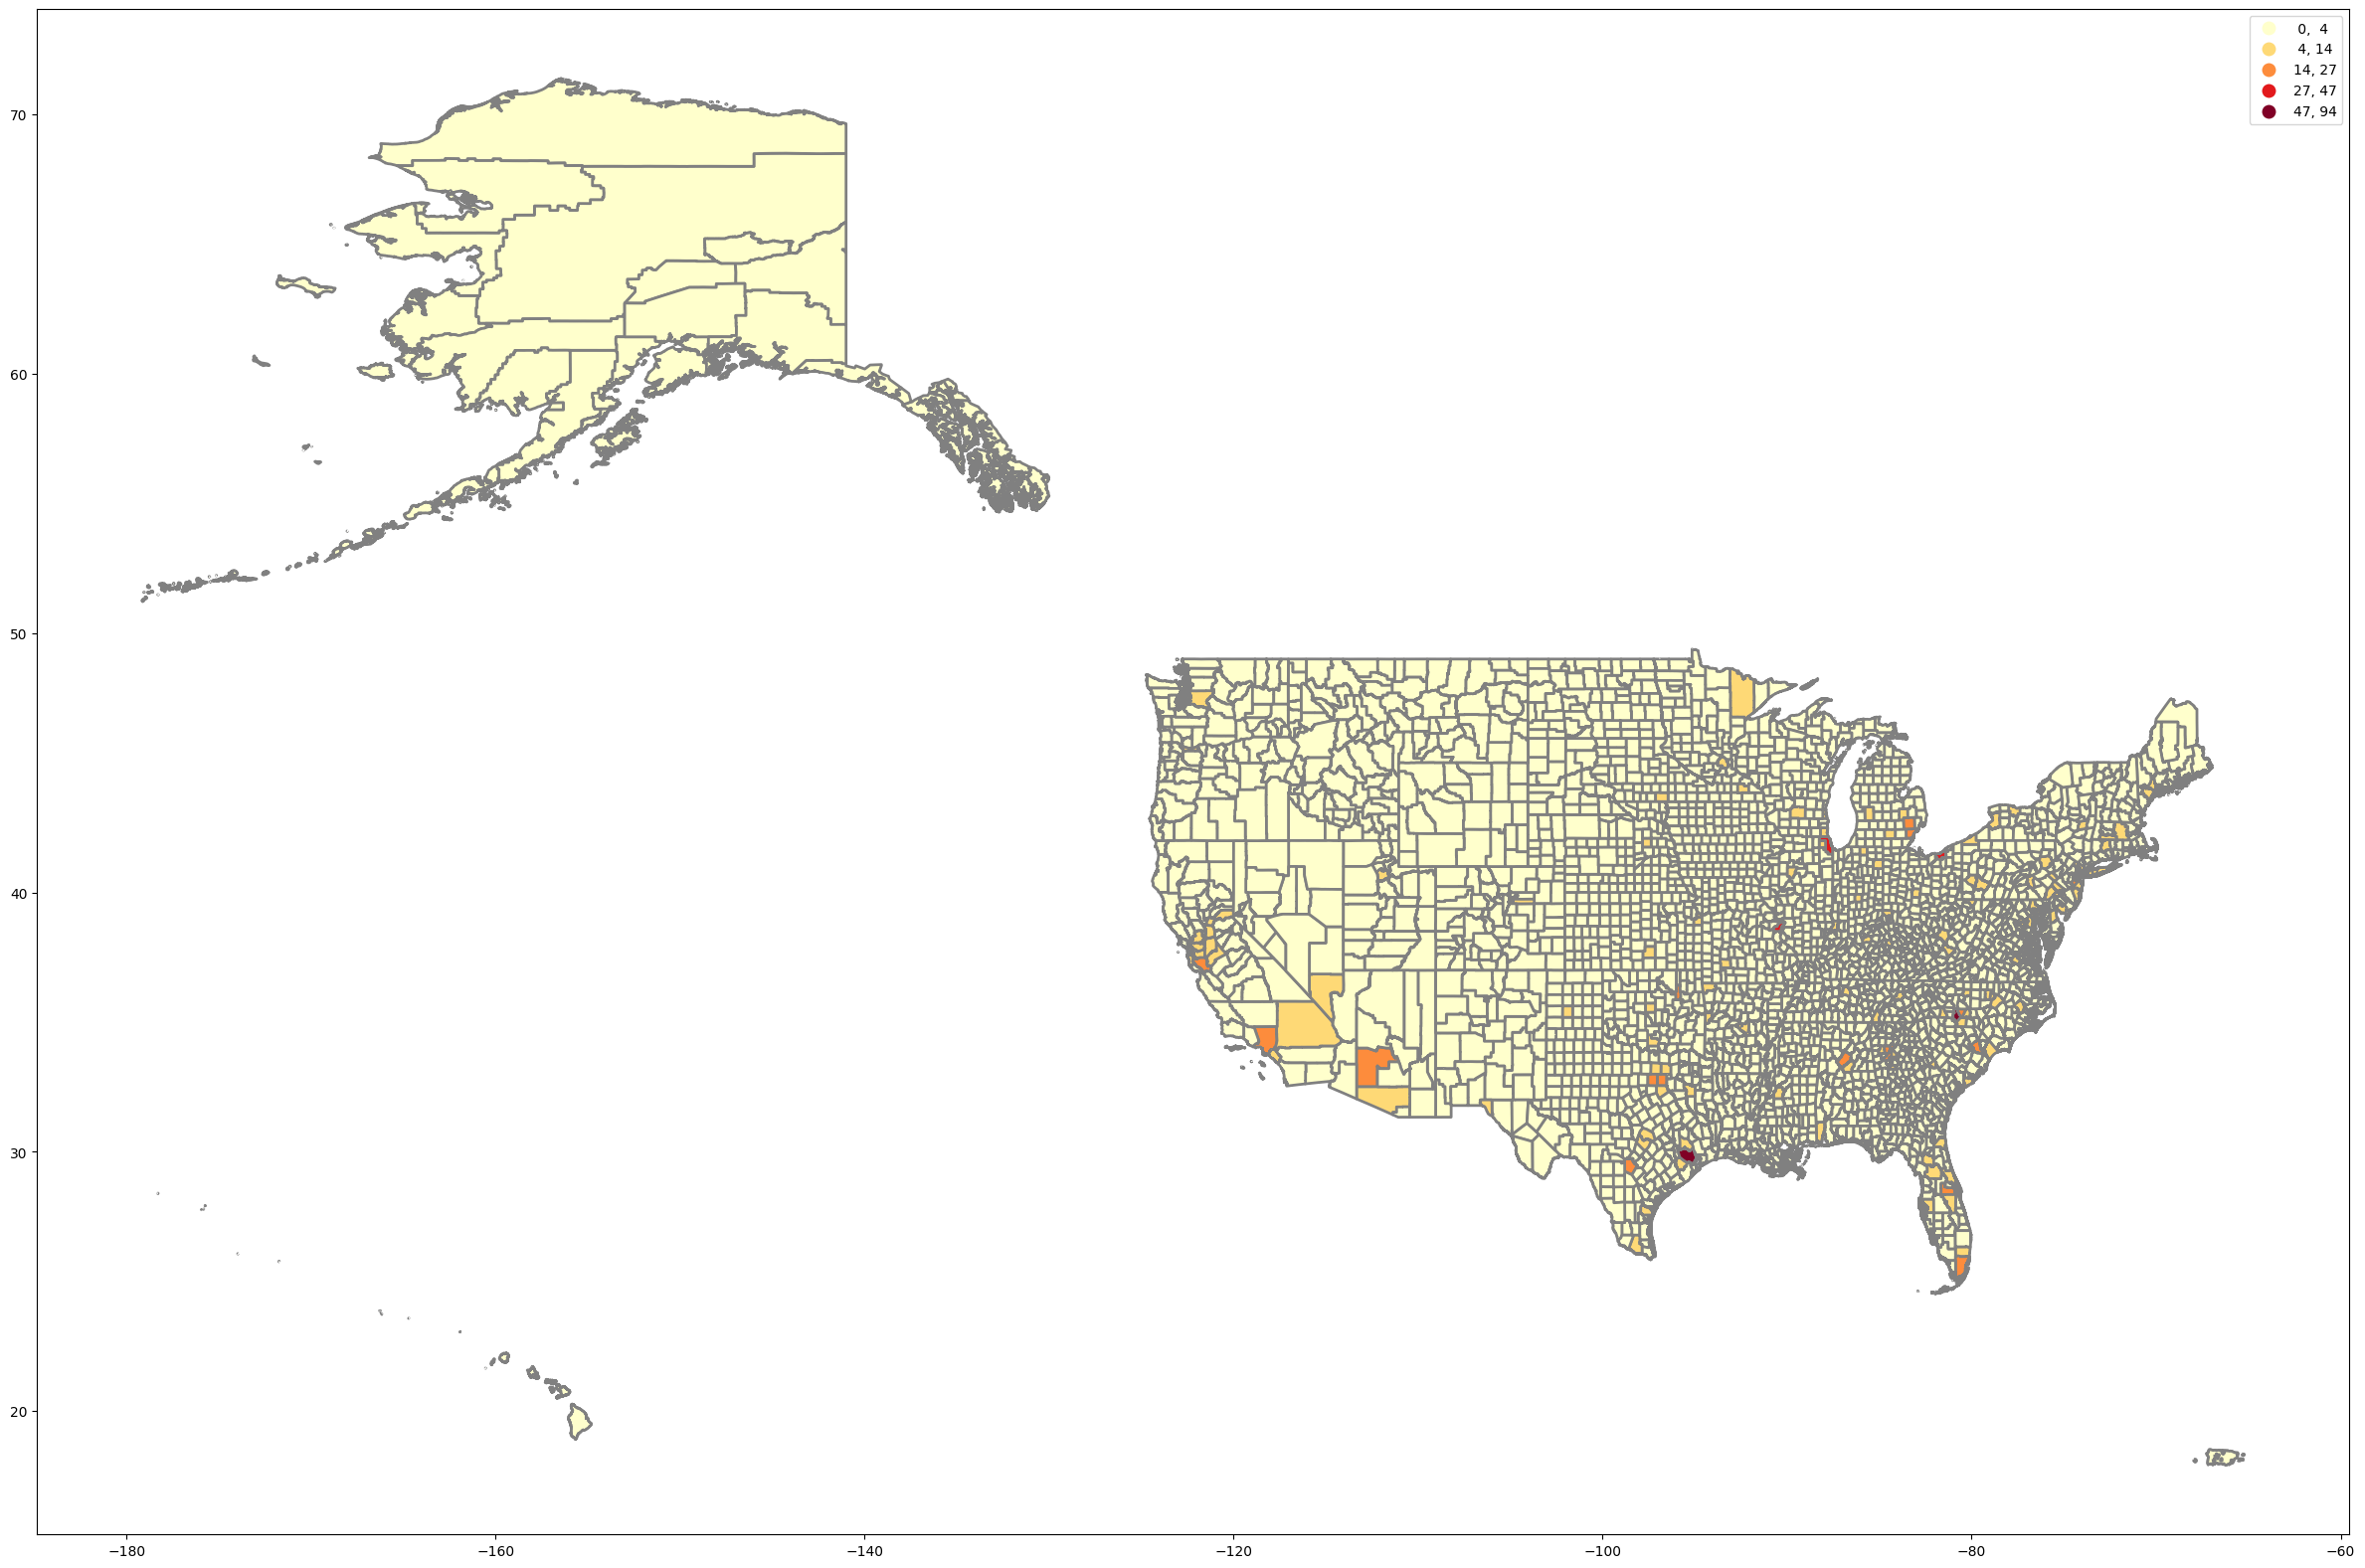

In [41]:
#sometimes lucky and have the variable we want to map in the shapefile
uscounty.plot(figsize=(30,36),column='ICU_COV',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

<Axes: >

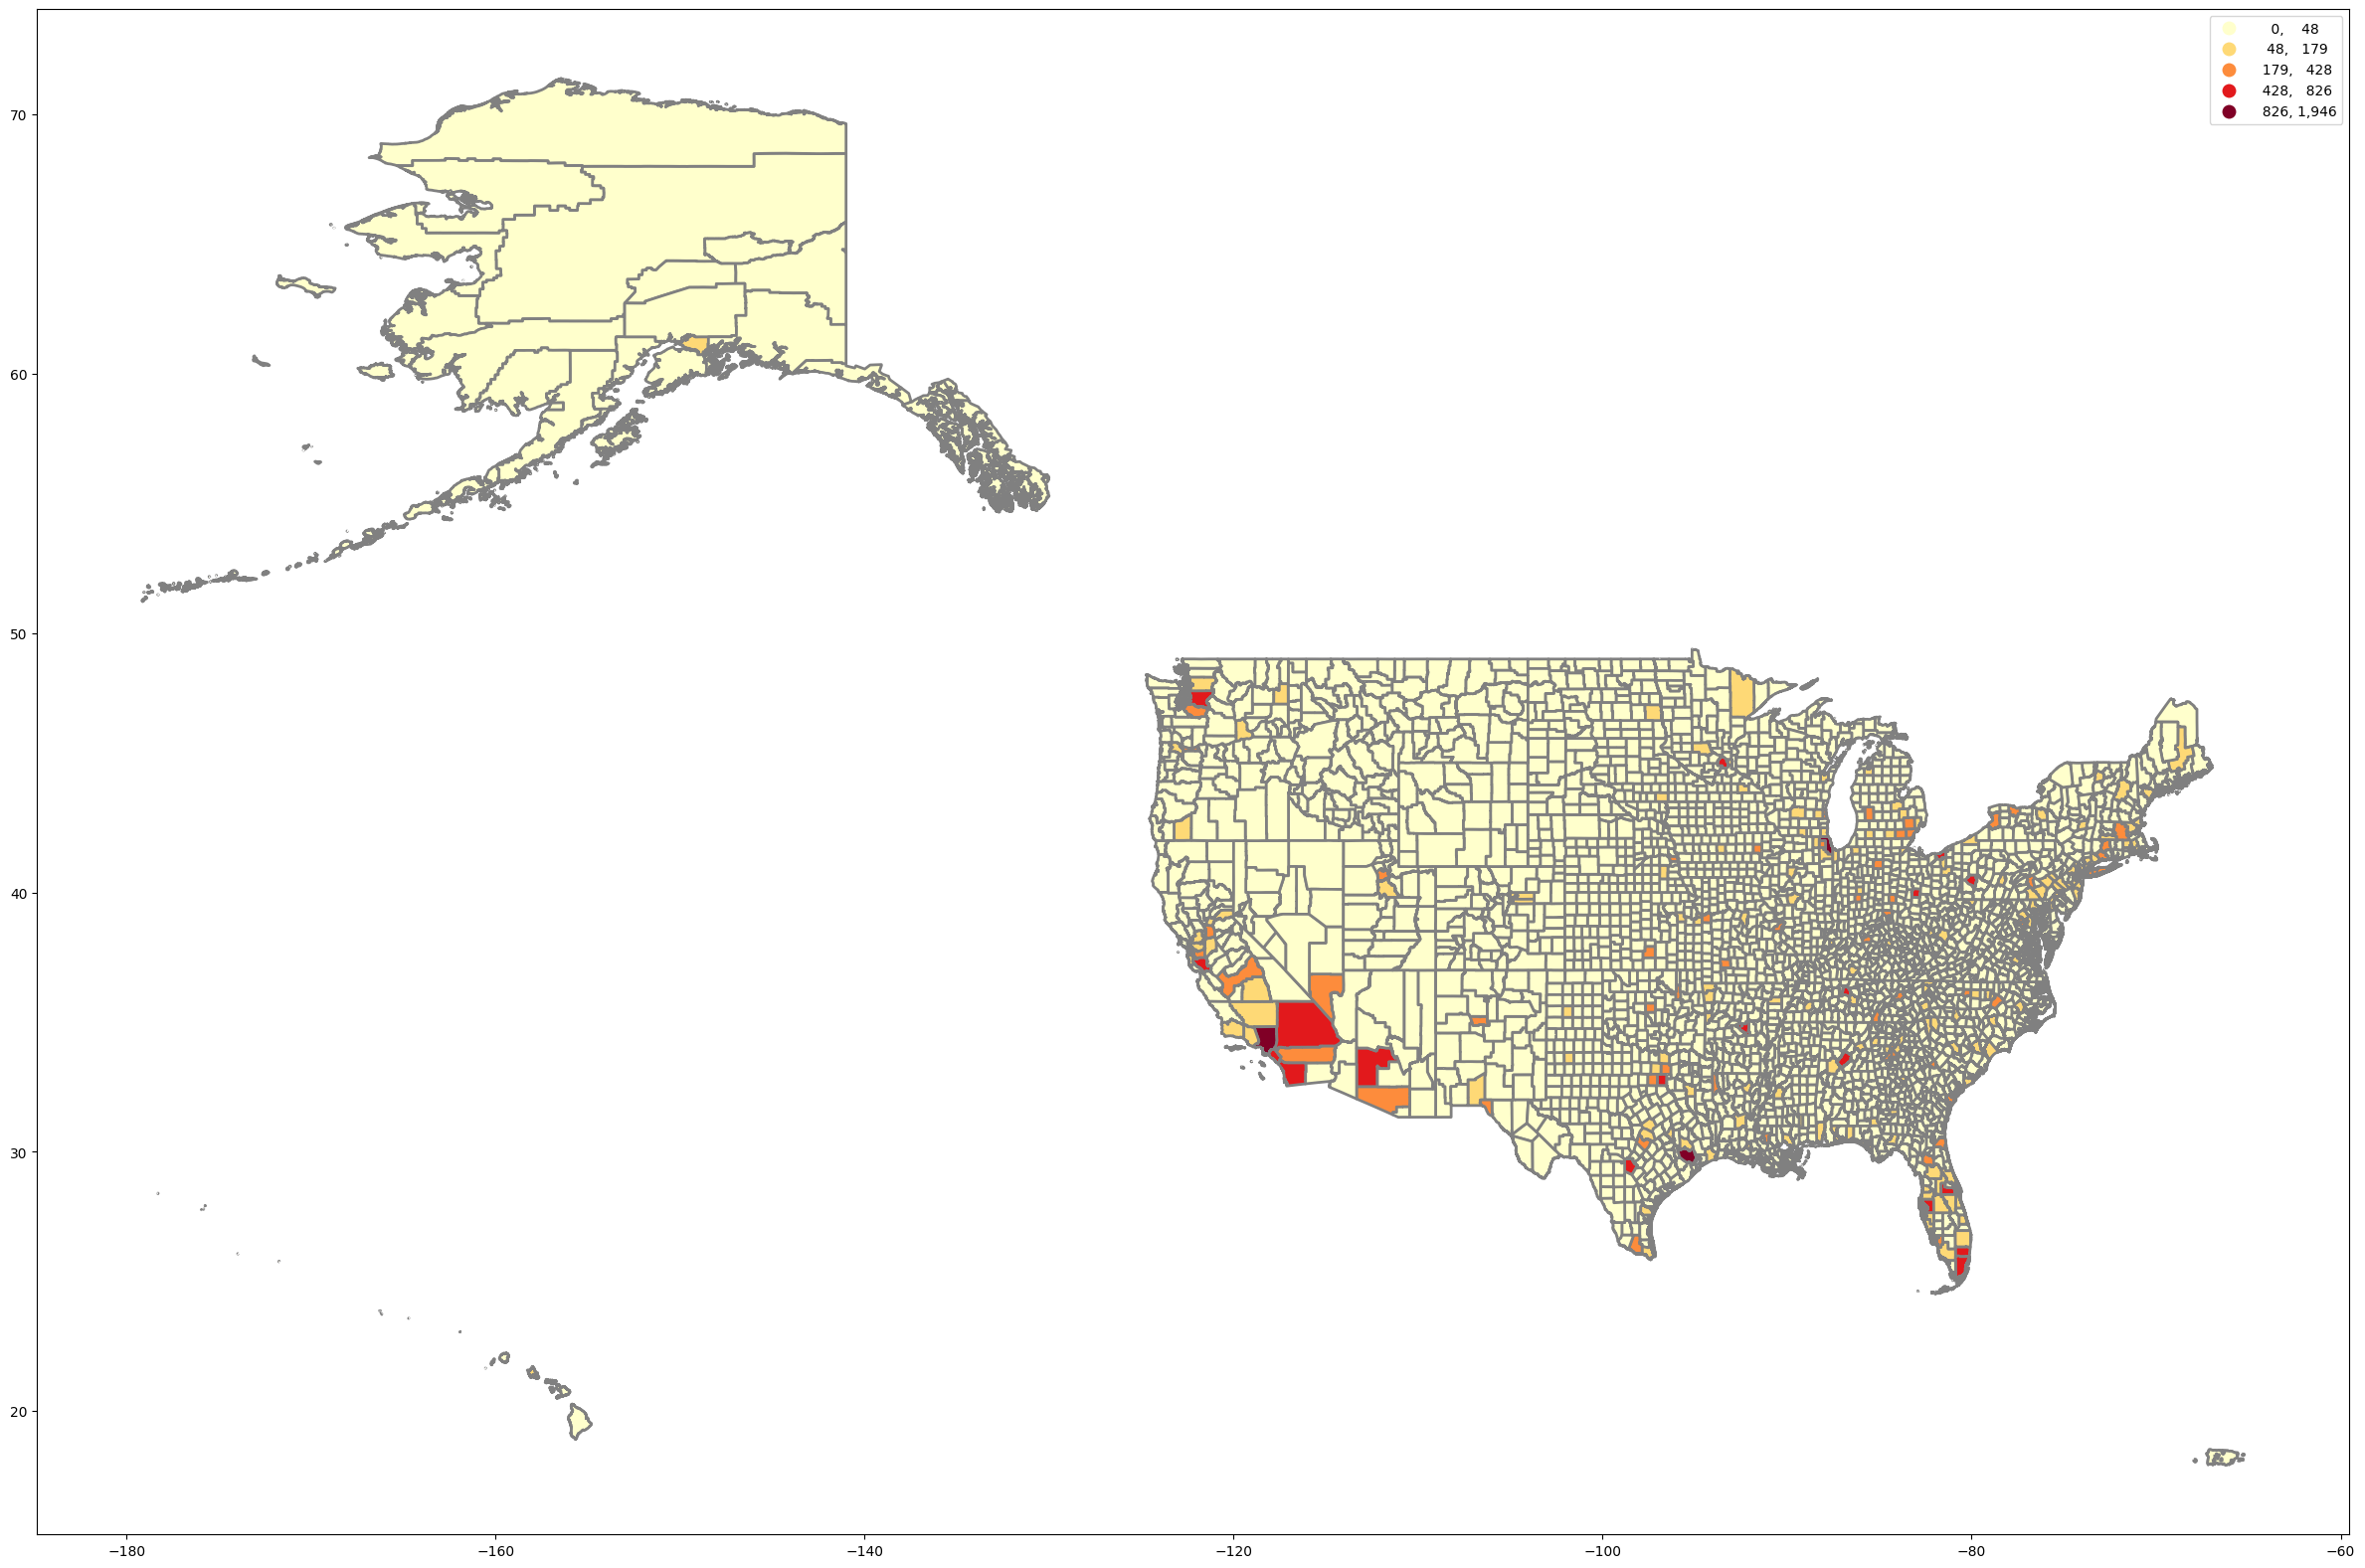

In [42]:
uscounty.plot(figsize=(30,36),column='ICU_nonCOV',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

<Axes: >

<Axes: >

[]

[]

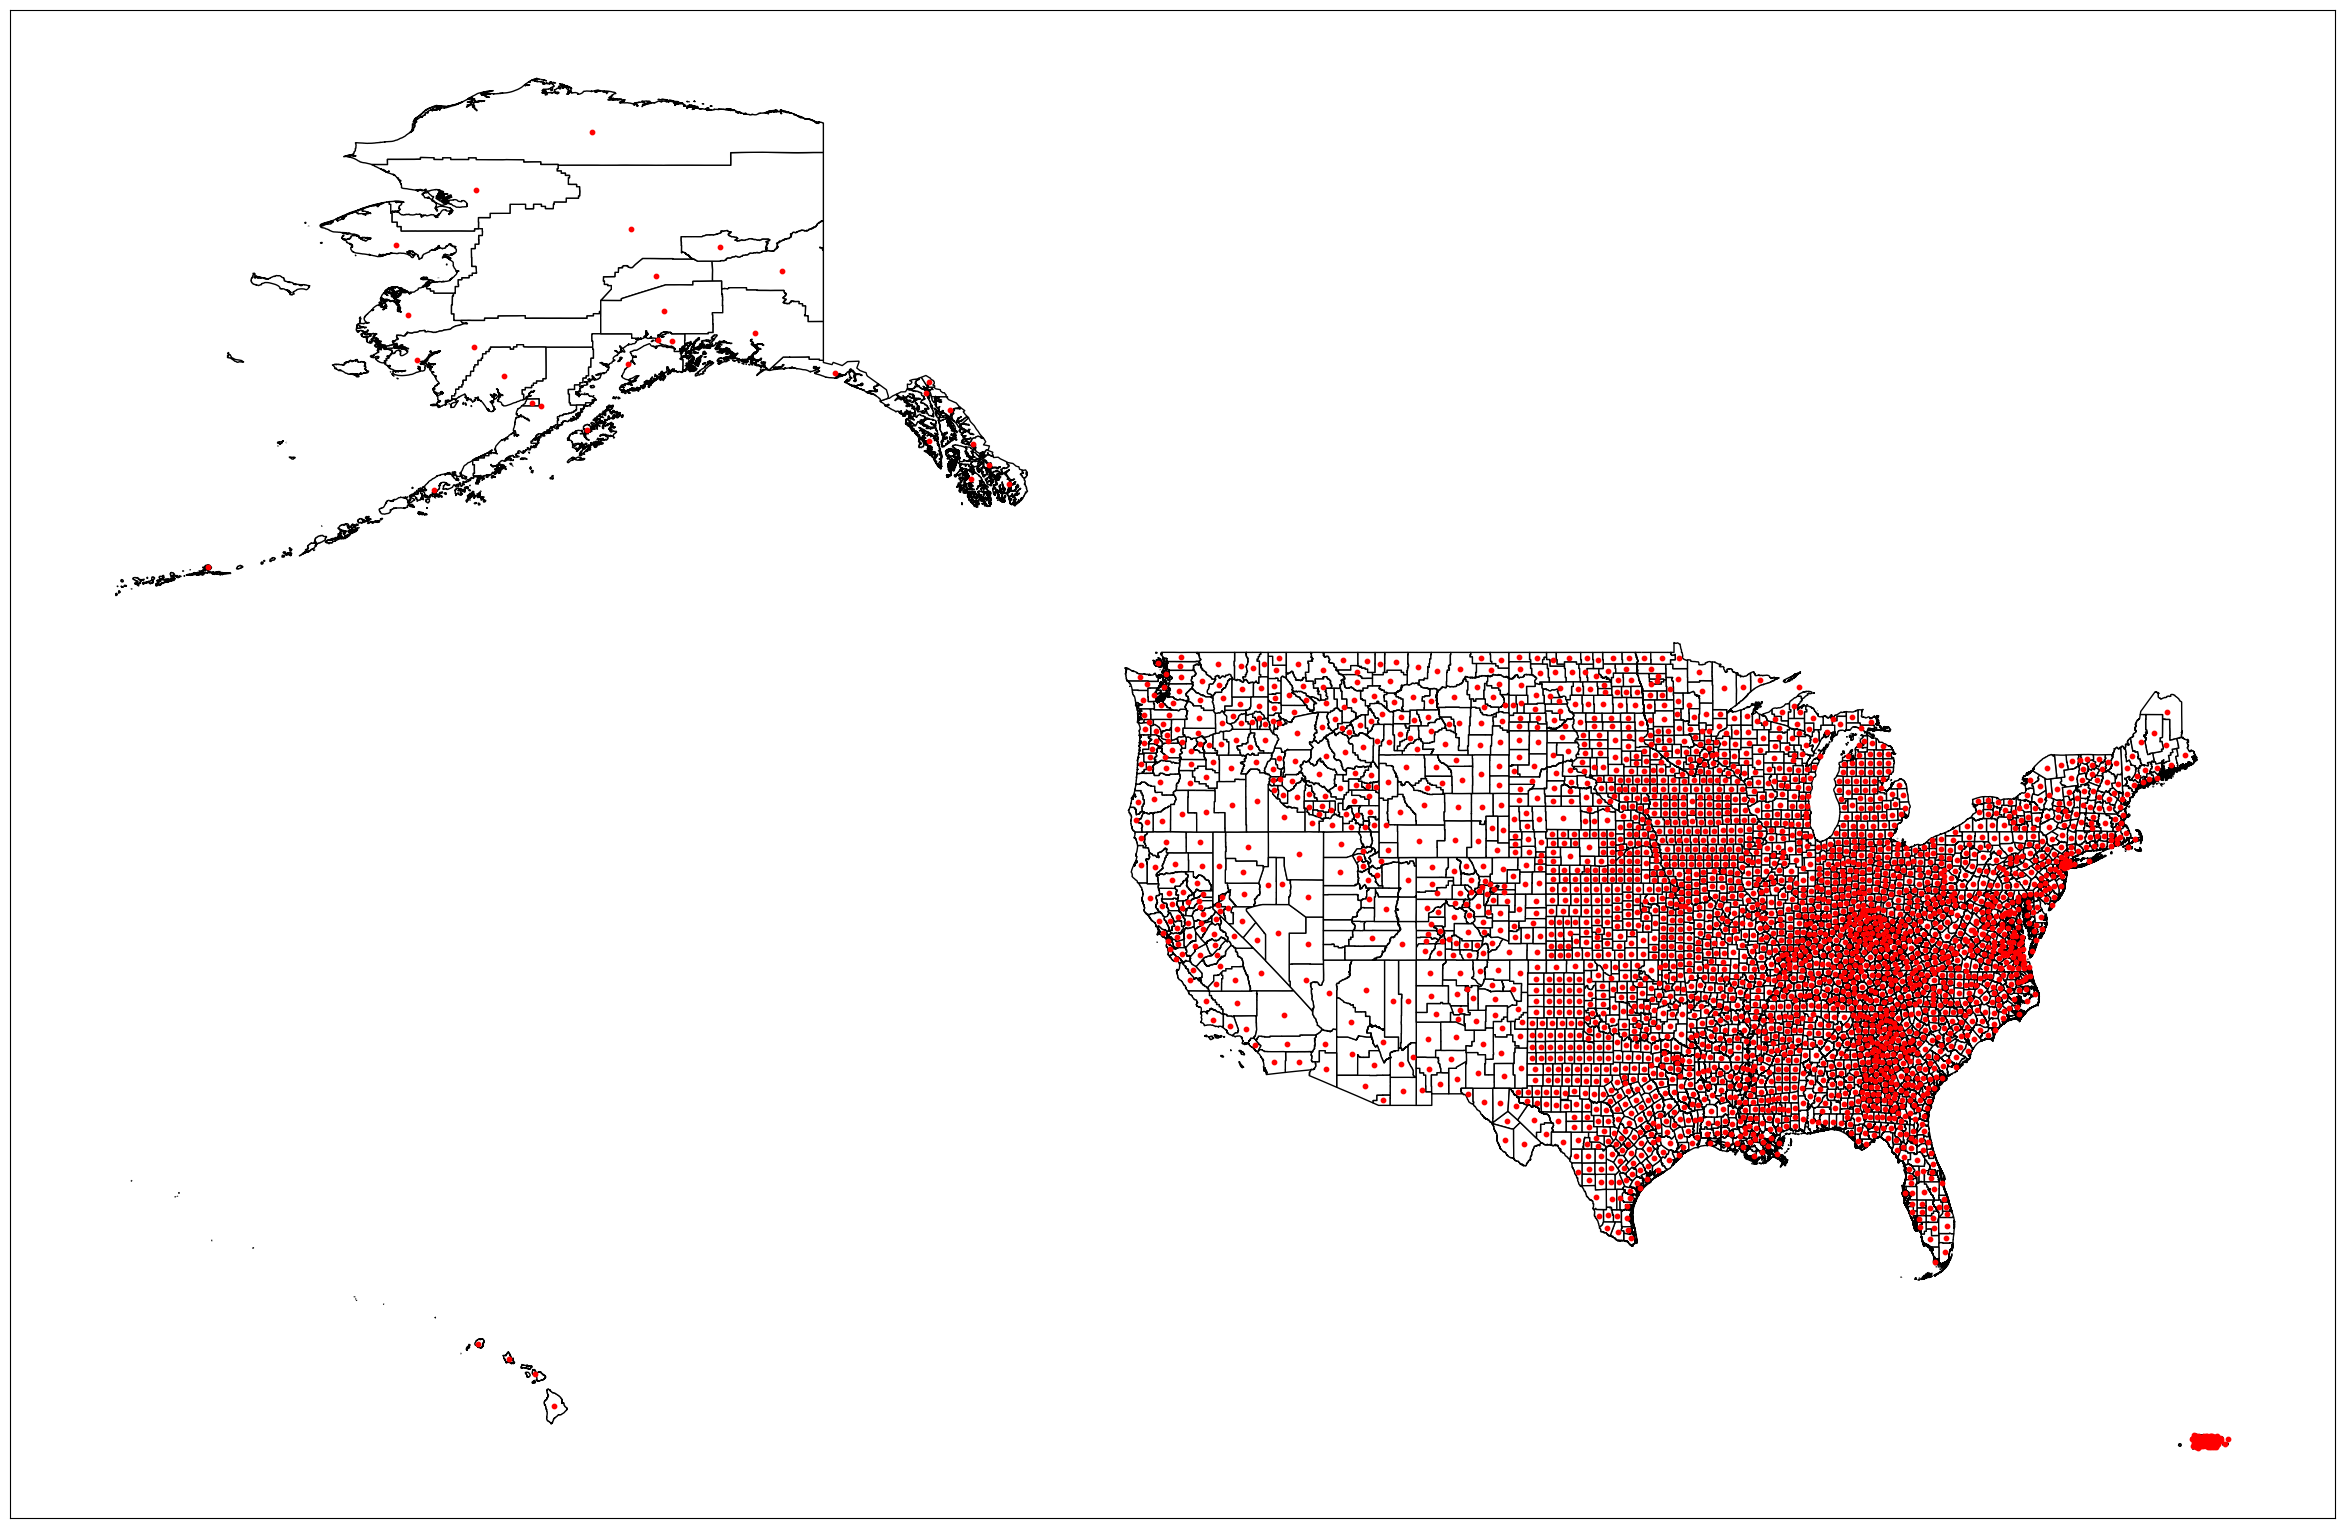

In [48]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O COVID-19_Cases_US.zip  https://docs.google.com/uc?id=19y-arbFrPCgDVogdo43S7rQCtTAVATK4&export=download
zip_ref = zipfile.ZipFile('COVID-19_Cases_US.zip', 'r');zip_ref.extractall(); zip_ref.close()

cases = gpd.read_file('COVID-19_Cases_US.shp')
#col.dtypes

fig, ax = plt.subplots(1, figsize=(30,50))
uscounty.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
cases.plot(ax=ax, marker='o', color='red', markersize=10)
#col.plot(column='ENROLL',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_title('Watersheds by area ($mi^2$)')